# Розрахунок середньої об'ємної теплоємності газової суміші при зміні складу та температури

## 1. Постановка задачі

Визначити середню об'ємну теплоємність газової суміші, яка змінює свій склад та температуру з часом. Початковий склад суміші: CO - 87.4%, CO₂ - 10.1%, O₂ - 1.6%, N₂ - 0.9% при температурі 100°С. Простежити зміну теплоємності протягом 11 кроків по 10 хвилин, враховуючи зміну як складу, так і температури.

Для розв'язання задачі будемо використовувати:

1. Формули розрахунку мольних теплоємностей газів при сталому тиску на основі табличних коефіцієнтів
2. Формули перетворення мольних теплоємностей в об'ємні
3. Адитивне правило для визначення середньої об'ємної теплоємності суміші
4. Врахування зміни температури на кожному кроці

## 2. Теоретичні відомості про теплоємність та її температурну залежність

### 2.1. Залежність теплоємності від температури

Теплоємність газів залежить від температури нелінійно. Для визначення мольної теплоємності при сталому тиску $c_p$ використовується емпірична формула:

$$c_p = a + b \cdot T + \frac{c}{T^2}$$

де:
- $a$, $b$, $c$ - емпіричні коефіцієнти, індивідуальні для кожного газу
- $T$ - абсолютна температура, К

Об'ємна теплоємність $c_{p,v}$ розраховується через мольну з урахуванням об'єму:

$$c_{p,v} = \frac{c_p}{V_m}$$

де $V_m$ - мольний об'єм газу при заданих температурі й тиску.

### 2.2. Вплив складу суміші на теплоємність

Середня теплоємність суміші за адитивним правилом розраховується як сума добутків теплоємностей компонентів на їх об'ємні частки:

$$c_{p,mix} = \sum_{i=1}^n r_i \cdot c_{p,i}$$

де:
- $r_i$ - об'ємна частка i-го компонента
- $c_{p,i}$ - теплоємність i-го компонента
- $n$ - кількість компонентів

## 3. Вхідні дані

### 3.1. Склад газової суміші на кожному кроці (об'ємні %)

| Крок | Час, хв | CO, % | CO₂, % | O₂, % | N₂, % |
|:----:|:-------:|:-----:|:------:|:-----:|:-----:|
|  0   |    0    | 87.4  |  10.1  |  1.6  |  0.9  |
|  1   |   10    | 87.1  |  10.6  |  1.4  |  0.8  |
|  2   |   20    | 82.7  |  15.2  |  1.3  |  0.8  |
|  3   |   30    | 77.6  |  20.6  |  1.1  |  0.7  |
|  4   |   40    | 73.5  |  25.0  |  0.9  |  0.6  |
|  5   |   50    | 67.3  |  31.5  |  0.7  |  0.5  |
|  6   |   60    | 55.5  |  43.5  |  0.6  |  0.4  |
|  7   |   70    | 40.1  |  59.1  |  0.5  |  0.3  |
|  8   |   80    | 25.9  |  73.4  |  0.4  |  0.3  |
|  9   |   90    | 20.3  |  79.2  |  0.3  |  0.2  |
|  10  |   100   | 12.5  |  87.1  |  0.2  |  0.2  |
|  11  |   110   |  8.8  |  91.0  |  0.1  |  0.1  |

### 3.2. Температура на кожному кроці (°C)

| Крок | Час, хв | Температура, °C |
|:----:|:-------:|:---------------:|
|  0   |    0    |       100       |
|  1   |   10    |       110       |
|  2   |   20    |       123       |
|  3   |   30    |       136       |
|  4   |   40    |       141       |
|  5   |   50    |       154       |
|  6   |   60    |       168       |
|  7   |   70    |       152       |
|  8   |   80    |       143       |
|  9   |   90    |       131       |
|  10  |   100   |       120       |
|  11  |   110   |       110       |

### 3.3. Коефіцієнти для розрахунку теплоємності газів

| Газ | a (кал/(моль·К)) | b·10³ (кал/(моль·К²)) | c·10⁻⁵ (кал·К/моль) |
|:---:|:----------------:|:---------------------:|:-------------------:|
| CO  |       6.79       |         0.98          |        -0.11        |
| CO₂ |      10.55       |         2.16          |        -2.04        |
| O₂  |       7.16       |         1.0           |        -0.4         |
| N₂  |       6.66       |         1.02          |          0          |

In [1]:
"""
Розрахунок зміни середньої об'ємної теплоємності газової суміші при зміні складу.
Склад газу на кожному кроці задається окремими списками для кожного компоненту.
"""

import matplotlib.pyplot as plt

# Константи
R = 8.31446261815  # Дж/(моль·К)
CAL_TO_JOULE = 4.1868  # Дж/кал
P_STANDARD = 101325  # Па (1 атм)
T_STANDARD = 273.15  # К (0°C)

# Коефіцієнти для газів (в кал/(моль·К))
# CO
a_co = 6.79
b_co = 0.98e-3  # Коефіцієнт b·10³ з таблиці
c_co = -0.11*1e5  # Множимо на 1e5 згідно з таблицею

# CO₂
a_co2 = 10.55
b_co2 = 2.16e-3
c_co2 = -2.04*1e5

# O₂
a_o2 = 7.16
b_o2 = 1.0e-3
c_o2 = -0.4*1e5

# N₂
a_n2 = 6.66
b_n2 = 1.02e-3
c_n2 = 0  # для N₂ немає коефіцієнта c

In [2]:
# Функція для розрахунку середньої об'ємної теплоємності суміші
def calculate_heat_capacity(r_co, r_co2, r_o2, r_n2, t_celsius):
    """
    Розраховує середню об'ємну теплоємність газової суміші з вказаним складом
    при заданій температурі.

    Parameters:
    r_co (float): Об'ємна частка CO
    r_co2 (float): Об'ємна частка CO₂
    r_o2 (float): Об'ємна частка O₂
    r_n2 (float): Об'ємна частка N₂
    t_celsius (float): Температура, °C

    Returns:
    float: Середня об'ємна теплоємність суміші, кДж/(м³·К)
    """
    # Перевірка суми часток
    total_fraction = r_co + r_co2 + r_o2 + r_n2
    if abs(total_fraction - 1.0) > 1e-10:
        raise ValueError(f"Сума об'ємних часток має дорівнювати 1.0, отримано: {total_fraction}")

    # Перетворення температури в Кельвіни
    T = t_celsius + T_STANDARD

    # Розрахунок мольних теплоємностей при сталому тиску (cp) в кал/(моль·К)
    cp_co_cal = a_co + b_co*T + c_co/(T*T)
    cp_co2_cal = a_co2 + b_co2*T + c_co2/(T*T)
    cp_o2_cal = a_o2 + b_o2*T + c_o2/(T*T)
    cp_n2_cal = a_n2 + b_n2*T + c_n2/(T*T)

    # Переведення в Дж/(моль·К)
    cp_co = cp_co_cal * CAL_TO_JOULE
    cp_co2 = cp_co2_cal * CAL_TO_JOULE
    cp_o2 = cp_o2_cal * CAL_TO_JOULE
    cp_n2 = cp_n2_cal * CAL_TO_JOULE

    # Об'єм 1 моля газу при даній температурі і тиску
    V_m = R * T / P_STANDARD  # м³/моль

    # Мольна теплоємність при сталому тиску
    cp_mix = r_co * cp_co + r_co2 * cp_co2 + r_o2 * cp_o2 + r_n2 * cp_n2  # Дж/(моль·К)

    # Об'ємна теплоємність при сталому тиску
    cp_mix_vol = cp_mix / V_m / 1000  # кДж/(м³·К)

    return cp_mix_vol

In [3]:
# Cклад газової суміші на кожному кроці (у відсотках)
co_percentages = [87.4, 87.1, 82.7, 77.6, 73.5, 67.3, 55.5, 40.1, 25.9, 20.3, 12.5, 8.8]
co2_percentages = [10.1, 10.6, 15.2, 20.6, 25, 31.5, 43.5, 59.1, 73.4, 79.2, 87.1, 91.0]
o2_percentages = [1.6, 1.45, 1.3, 1.1, 0.9, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
n2_percentages = [0.9, 0.85, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.3, 0.2, 0.2, 0.1]

In [4]:
# Параметри для побудови графіка
time_per_step = 10  # Час на один крок, хв

In [5]:
# Список температур на кожному кроці (в градусах Цельсія)
temperatures = [100, 110, 123, 136, 141, 154, 168, 152, 143, 131, 120, 110]
# temperatures = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [6]:
# Перевірка на однакову довжину всіх списків
if not (len(co_percentages) == len(co2_percentages) == len(o2_percentages) == len(n2_percentages)):
    raise ValueError("Всі списки з частками компонентів повинні мати однакову довжину")

In [7]:
# Перевірка на відповідність кількості кроків та температур
if len(temperatures) < len(co_percentages):
    raise ValueError(f"Список температур повинен мати не менше елементів ніж кількість кроків: {len(co_percentages)}")

In [8]:
steps = len(co_percentages)  # Кількість точок (кроків + початкова точка)

In [9]:
times = [i * time_per_step for i in range(steps)]  # Час у хвилинах

In [10]:
# Обмежуємо список температур кількістю кроків
temperatures = temperatures[:steps]

In [11]:
# Ініціалізація масивів для зберігання теплоємностей
heat_capacities = []

In [12]:
print("Зміна середньої об'ємної теплоємності газової суміші при зміні складу та температури\n")

# Виведення заголовка таблиці з використанням табличної форми
table_width = 110
header = f"| {'№':^4} | {'Час, хв':^10} | {'T, °C':^8} | {'CO, %':^10} | {'CO₂, %':^10} | {'O₂, %':^10} | {'N₂, %':^10} | {'Теплоємність, кДж/(м³·К)':^25} |"

print("=" * table_width)
print(header)
print("=" * table_width)

# Обчислення теплоємності для кожного кроку
for step in range(steps):
    # Отримуємо об'ємні частки у відсотках для поточного кроку
    co_percent = co_percentages[step]
    co2_percent = co2_percentages[step]
    o2_percent = o2_percentages[step]
    n2_percent = n2_percentages[step]

    # Отримуємо температуру для поточного кроку
    t_celsius = temperatures[step]

    # Перетворення відсотків в частки
    r_co = co_percent / 100
    r_co2 = co2_percent / 100
    r_o2 = o2_percent / 100
    r_n2 = n2_percent / 100

    # Розрахунок середньої об'ємної теплоємності
    try:
        cp_mix_vol = calculate_heat_capacity(r_co, r_co2, r_o2, r_n2, t_celsius)
        heat_capacities.append(cp_mix_vol)

        # Виведення результатів у вигляді таблиці
        row = f"| {step:^4} | {step * time_per_step:^10} | {t_celsius:^8} | {co_percent:^10.1f} | {co2_percent:^10.1f} | {o2_percent:^10.1f} | {n2_percent:^10.1f} | {cp_mix_vol:^25.4f} |"
        print(row)

    except ValueError as e:
        error_row = f"| {step:^4} | {step * time_per_step:^10} | {t_celsius:^8} | {co_percent:^10.1f} | {co2_percent:^10.1f} | {o2_percent:^10.1f} | {n2_percent:^10.1f} | {'ПОМИЛКА: ' + str(e):^25} |"
        print(error_row)

print("=" * table_width)

Зміна середньої об'ємної теплоємності газової суміші при зміні складу та температури

|  №   |  Час, хв   |  T, °C   |   CO, %    |   CO₂, %   |   O₂, %    |   N₂, %    | Теплоємність, кДж/(м³·К)  |
|  0   |     0      |   100    |    87.4    |    10.1    |    1.6     |    0.9     |          1.0068           |
|  1   |     10     |   110    |    87.1    |    10.6    |    1.4     |    0.8     |          0.9854           |
|  2   |     20     |   123    |    82.7    |    15.2    |    1.3     |    0.8     |          0.9745           |
|  3   |     30     |   136    |    77.6    |    20.6    |    1.1     |    0.7     |          0.9682           |
|  4   |     40     |   141    |    73.5    |    25.0    |    0.9     |    0.6     |          0.9750           |
|  5   |     50     |   154    |    67.3    |    31.5    |    0.7     |    0.5     |          0.9747           |
|  6   |     60     |   168    |    55.5    |    43.5    |    0.6     |    0.4     |          0.9944           |
|  7   |  

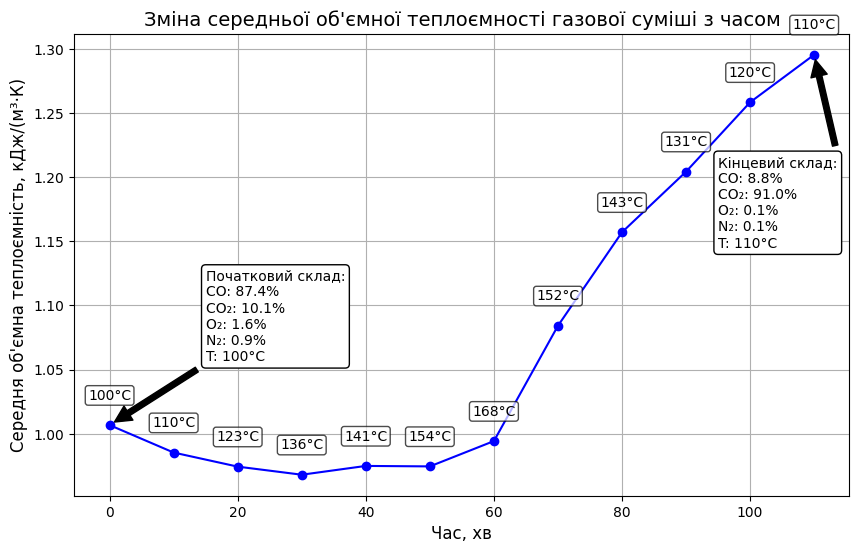

In [13]:
# Графік 1: Залежність теплоємності від часу
plt.figure(figsize=(10, 6))
plt.plot(times, heat_capacities, marker='o', linestyle='-', color='b')
plt.grid(True)
plt.xlabel('Час, хв', fontsize=12)
plt.ylabel('Середня об\'ємна теплоємність, кДж/(м³·К)', fontsize=12)
plt.title('Зміна середньої об\'ємної теплоємності газової суміші з часом', fontsize=14)

# Додавання температур до першого графіку
for i, temp in enumerate(temperatures):
    plt.annotate(f'{temp}°C', xy=(times[i], heat_capacities[i]),
                 xytext=(times[i], heat_capacities[i] + 0.02),
                 bbox=dict(boxstyle="round,pad=0.2", facecolor="white", edgecolor="black", alpha=0.7),
                 ha='center')

# Додавання пояснень до першого графіку
plt.annotate(f'Початковий склад:\nCO: {co_percentages[0]}%\nCO₂: {co2_percentages[0]}%\nO₂: {o2_percentages[0]}%\nN₂: {n2_percentages[0]}%\nT: {temperatures[0]}°C',
             xy=(times[0], heat_capacities[0]), xytext=(times[0]+15, heat_capacities[0]+0.05),
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate(f'Кінцевий склад:\nCO: {co_percentages[-1]}%\nCO₂: {co2_percentages[-1]}%\nO₂: {o2_percentages[-1]}%\nN₂: {n2_percentages[-1]}%\nT: {temperatures[-1]}°C',
             xy=(times[-1], heat_capacities[-1]), xytext=(times[-1]-15, heat_capacities[-1]-0.15),
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=1),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

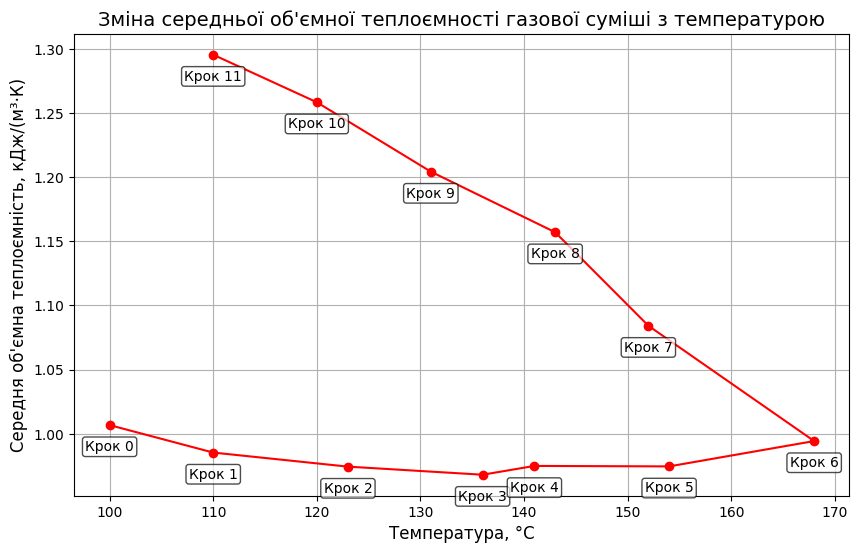

In [14]:
# Графік 2: Залежність теплоємності від температури
plt.figure(figsize=(10, 6))
plt.plot(temperatures, heat_capacities, marker='o', linestyle='-', color='r')
plt.grid(True)
plt.xlabel('Температура, °C', fontsize=12)
plt.ylabel('Середня об\'ємна теплоємність, кДж/(м³·К)', fontsize=12)
plt.title('Зміна середньої об\'ємної теплоємності газової суміші з температурою', fontsize=14)

# Додавання номерів кроків до другого графіку
for i in range(steps):
    plt.annotate(f'Крок {i}', xy=(temperatures[i], heat_capacities[i]),
                 xytext=(temperatures[i], heat_capacities[i] - 0.02),
                 bbox=dict(boxstyle="round,pad=0.2", facecolor="white", edgecolor="black", alpha=0.7),
                 ha='center')


plt.show()

In [15]:
if len(heat_capacities) > 1:
    print("\nВисновки:")
    print(f"При зміні складу газової суміші та температури від початкового до кінцевого стану")
    print(f"середня об'ємна теплоємність змінюється з {heat_capacities[0]:.4f} до {heat_capacities[-1]:.4f} кДж/(м³·К).")
    print(f"Це зумовлено двома факторами:")
    print(f"1. Зміною складу суміші: збільшенням вмісту CO₂ з {co2_percentages[0]}% до {co2_percentages[-1]}%, який має вищу теплоємність порівняно з CO.")
    print(f"2. Зміною температури: з {temperatures[0]}°C до {temperatures[-1]}°C, що також впливає на теплоємність компонентів.")


Висновки:
При зміні складу газової суміші та температури від початкового до кінцевого стану
середня об'ємна теплоємність змінюється з 1.0068 до 1.2954 кДж/(м³·К).
Це зумовлено двома факторами:
1. Зміною складу суміші: збільшенням вмісту CO₂ з 10.1% до 91.0%, який має вищу теплоємність порівняно з CO.
2. Зміною температури: з 100°C до 110°C, що також впливає на теплоємність компонентів.


In [16]:
# Функція для розрахунку середньої теплоємності суміші
def calculate_heat_capacity(r_co, r_co2, r_o2, r_n2, t_celsius):
    """
    Розраховує середню мольну та об'ємну теплоємність газової суміші з вказаним складом
    при заданій температурі.

    Parameters:
    r_co (float): Об'ємна частка CO
    r_co2 (float): Об'ємна частка CO₂
    r_o2 (float): Об'ємна частка O₂
    r_n2 (float): Об'ємна частка N₂
    t_celsius (float): Температура, °C

    Returns:
    tuple: (cp_mix, cp_mix_vol) де:
           cp_mix - середня мольна теплоємність, кДж/(моль·К)
           cp_mix_vol - середня об'ємна теплоємність, кДж/(м³·К)
    """
    # Перевірка суми часток
    total_fraction = r_co + r_co2 + r_o2 + r_n2
    if abs(total_fraction - 1.0) > 1e-10:
        raise ValueError(f"Сума об'ємних часток має дорівнювати 1.0, отримано: {total_fraction}")

    # Перетворення температури в Кельвіни
    T = t_celsius + T_STANDARD

    # Розрахунок мольних теплоємностей при сталому тиску (cp) в кал/(моль·К)
    cp_co_cal = a_co + b_co*T + c_co/(T*T)
    cp_co2_cal = a_co2 + b_co2*T + c_co2/(T*T)
    cp_o2_cal = a_o2 + b_o2*T + c_o2/(T*T)
    cp_n2_cal = a_n2 + b_n2*T + c_n2/(T*T)

    # Переведення в Дж/(моль·К)
    cp_co = cp_co_cal * CAL_TO_JOULE
    cp_co2 = cp_co2_cal * CAL_TO_JOULE
    cp_o2 = cp_o2_cal * CAL_TO_JOULE
    cp_n2 = cp_n2_cal * CAL_TO_JOULE

    # Об'єм 1 моля газу при даній температурі і тиску
    V_m = R * T / P_STANDARD  # м³/моль

    # Мольна теплоємність при сталому тиску
    cp_mix = r_co * cp_co + r_co2 * cp_co2 + r_o2 * cp_o2 + r_n2 * cp_n2  # Дж/(моль·К)
    cp_mix_kj = cp_mix / 1000  # кДж/(моль·К)

    # Об'ємна теплоємність при сталому тиску
    cp_mix_vol = cp_mix / V_m / 1000  # кДж/(м³·К)

    return cp_mix_kj, cp_mix_vol

# Ініціалізація масивів для зберігання теплоємностей
heat_capacities_molar = []  # Мольні теплоємності
heat_capacities_volumetric = []  # Об'ємні теплоємності

print("Зміна середньої теплоємності газової суміші при зміні складу та температури\n")

# Виведення заголовка таблиці з використанням табличної форми
table_width = 145
header = f"| {'№':^4} | {'Час, хв':^10} | {'T, °C':^8} | {'CO, %':^10} | {'CO₂, %':^10} | {'O₂, %':^10} | {'N₂, %':^10} | {'Мольна теплоємність, кДж/(моль·К)':^30} | {'Об\'ємна теплоємність, кДж/(м³·К)':^30} |"

print("=" * table_width)
print(header)
print("=" * table_width)

# Обчислення теплоємності для кожного кроку
for step in range(steps):
    # Отримуємо об'ємні частки у відсотках для поточного кроку
    co_percent = co_percentages[step]
    co2_percent = co2_percentages[step]
    o2_percent = o2_percentages[step]
    n2_percent = n2_percentages[step]

    # Отримуємо температуру для поточного кроку
    t_celsius = temperatures[step]

    # Перетворення відсотків в частки
    r_co = co_percent / 100
    r_co2 = co2_percent / 100
    r_o2 = o2_percent / 100
    r_n2 = n2_percent / 100

    # Розрахунок середньої мольної та об'ємної теплоємності
    try:
        cp_mix_molar, cp_mix_vol = calculate_heat_capacity(r_co, r_co2, r_o2, r_n2, t_celsius)
        heat_capacities_molar.append(cp_mix_molar)
        heat_capacities_volumetric.append(cp_mix_vol)

        # Виведення результатів у вигляді таблиці
        row = f"| {step:^4} | {step * time_per_step:^10} | {t_celsius:^8} | {co_percent:^10.1f} | {co2_percent:^10.1f} | {o2_percent:^10.1f} | {n2_percent:^10.1f} | {cp_mix_molar:^30.4f} | {cp_mix_vol:^30.4f} |"
        print(row)

    except ValueError as e:
        error_row = f"| {step:^4} | {step * time_per_step:^10} | {t_celsius:^8} | {co_percent:^10.1f} | {co2_percent:^10.1f} | {o2_percent:^10.1f} | {n2_percent:^10.1f} | {'ПОМИЛКА: ' + str(e):^30} | {'ПОМИЛКА: ' + str(e):^30} |"
        print(error_row)

print("=" * table_width)

Зміна середньої теплоємності газової суміші при зміні складу та температури

|  №   |  Час, хв   |  T, °C   |   CO, %    |   CO₂, %   |   O₂, %    |   N₂, %    | Мольна теплоємність, кДж/(моль·К) | Об'ємна теплоємність, кДж/(м³·К) |
|  0   |     0      |   100    |    87.4    |    10.1    |    1.6     |    0.9     |             0.0308             |             1.0068             |
|  1   |     10     |   110    |    87.1    |    10.6    |    1.4     |    0.8     |             0.0310             |             0.9854             |
|  2   |     20     |   123    |    82.7    |    15.2    |    1.3     |    0.8     |             0.0317             |             0.9745             |
|  3   |     30     |   136    |    77.6    |    20.6    |    1.1     |    0.7     |             0.0325             |             0.9682             |
|  4   |     40     |   141    |    73.5    |    25.0    |    0.9     |    0.6     |             0.0331             |             0.9750             |
|  5   |    

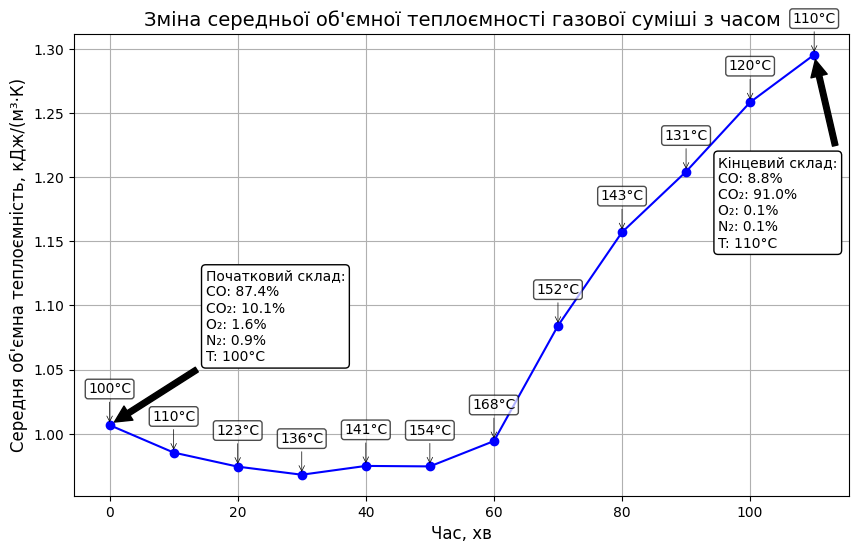

In [17]:
# Графік 3: Залежність об'ємної теплоємності від часу
plt.figure(figsize=(10, 6))
plt.plot(times, heat_capacities_volumetric, marker='o', linestyle='-', color='b')
plt.grid(True)
plt.xlabel('Час, хв', fontsize=12)
plt.ylabel('Середня об\'ємна теплоємність, кДж/(м³·К)', fontsize=12)
plt.title('Зміна середньої об\'ємної теплоємності газової суміші з часом', fontsize=14)

# Додавання температур до першого графіку
for i, temp in enumerate(temperatures):
    plt.annotate(f'{temp}°C', xy=(times[i], heat_capacities_volumetric[i]),
                 xytext=(times[i], heat_capacities_volumetric[i] + 0.025),  # Більший відступ
                 bbox=dict(boxstyle="round,pad=0.2", facecolor="white", edgecolor="black", alpha=0.7),
                 ha='center',
                 arrowprops=dict(arrowstyle='->', lw=0.5, connectionstyle="arc3,rad=0"))

# Додавання пояснень до першого графіку
plt.annotate(f'Початковий склад:\nCO: {co_percentages[0]}%\nCO₂: {co2_percentages[0]}%\nO₂: {o2_percentages[0]}%\nN₂: {n2_percentages[0]}%\nT: {temperatures[0]}°C',
             xy=(times[0], heat_capacities_volumetric[0]), xytext=(times[0]+15, heat_capacities_volumetric[0]+0.05),
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate(f'Кінцевий склад:\nCO: {co_percentages[-1]}%\nCO₂: {co2_percentages[-1]}%\nO₂: {o2_percentages[-1]}%\nN₂: {n2_percentages[-1]}%\nT: {temperatures[-1]}°C',
             xy=(times[-1], heat_capacities_volumetric[-1]), xytext=(times[-1]-15, heat_capacities_volumetric[-1]-0.15),
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=1),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

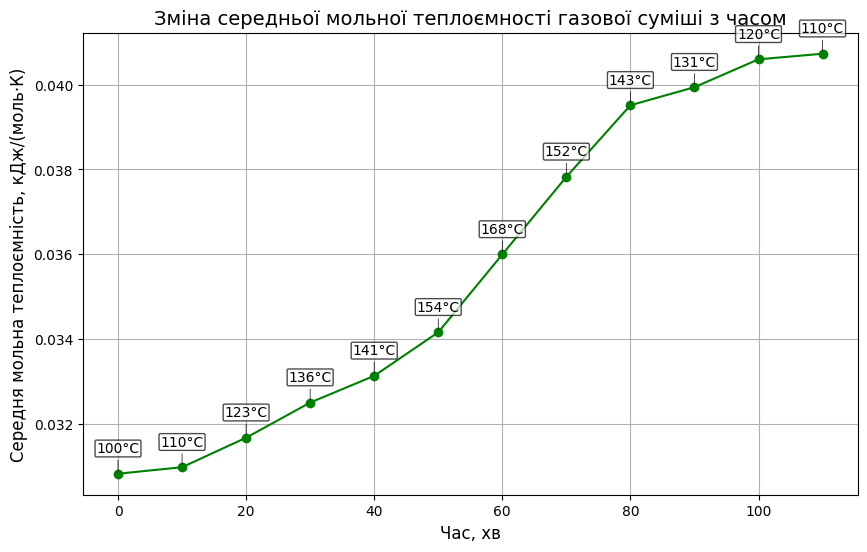

In [18]:
# Графік 4: Залежність мольної теплоємності від часу
plt.figure(figsize=(10, 6))
plt.plot(times, heat_capacities_molar, marker='o', linestyle='-', color='g')
plt.grid(True)
plt.xlabel('Час, хв', fontsize=12)
plt.ylabel('Середня мольна теплоємність, кДж/(моль·К)', fontsize=12)
plt.title('Зміна середньої мольної теплоємності газової суміші з часом', fontsize=14)

# Додавання температур до графіку мольної теплоємності
for i, temp in enumerate(temperatures):
    plt.annotate(f'{temp}°C', xy=(times[i], heat_capacities_molar[i]),
                 xytext=(times[i], heat_capacities_molar[i] + 0.0005),  # Мінімальний відступ
                 bbox=dict(boxstyle="round,pad=0.1", facecolor="white", edgecolor="black", alpha=0.7),
                 ha='center',
                 arrowprops=dict(arrowstyle="-", lw=0.5, connectionstyle="arc3,rad=0"))

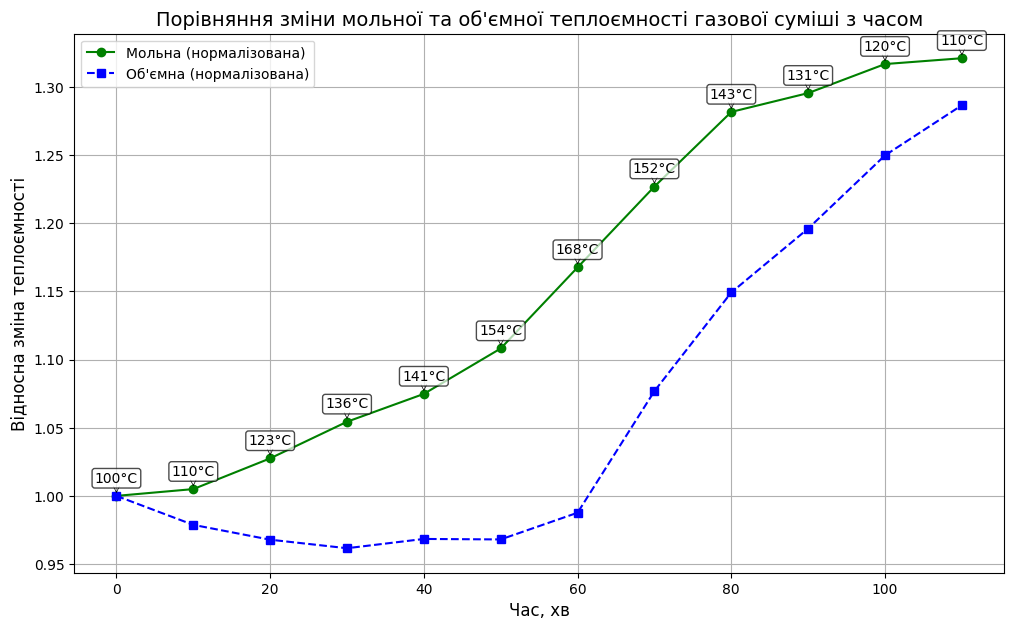

In [19]:
# Графік 5: Порівняння теплоємностей (нормалізованих) від часу
plt.figure(figsize=(12, 7))

# Нормалізація для кращого порівняння на одному графіку
norm_factor_molar = heat_capacities_molar[0]
norm_factor_vol = heat_capacities_volumetric[0]

normalized_molar = [cp / norm_factor_molar for cp in heat_capacities_molar]
normalized_vol = [cp / norm_factor_vol for cp in heat_capacities_volumetric]

plt.plot(times, normalized_molar, marker='o', linestyle='-', color='g', label='Мольна (нормалізована)')
plt.plot(times, normalized_vol, marker='s', linestyle='--', color='b', label='Об\'ємна (нормалізована)')
plt.grid(True)
plt.xlabel('Час, хв', fontsize=12)
plt.ylabel('Відносна зміна теплоємності', fontsize=12)
plt.title('Порівняння зміни мольної та об\'ємної теплоємності газової суміші з часом', fontsize=14)
plt.legend()

# Додавання температур до графіку порівняння
for i, temp in enumerate(temperatures):
    plt.annotate(f'{temp}°C', xy=(times[i], normalized_molar[i]),
                 xytext=(times[i], normalized_molar[i] + 0.01),  # Ще більший відступ для кращої видимості
                 bbox=dict(boxstyle="round,pad=0.2", facecolor="white", edgecolor="black", alpha=0.7),
                 ha='center',
                 arrowprops=dict(arrowstyle='->', lw=0.5, connectionstyle="arc3,rad=0"))

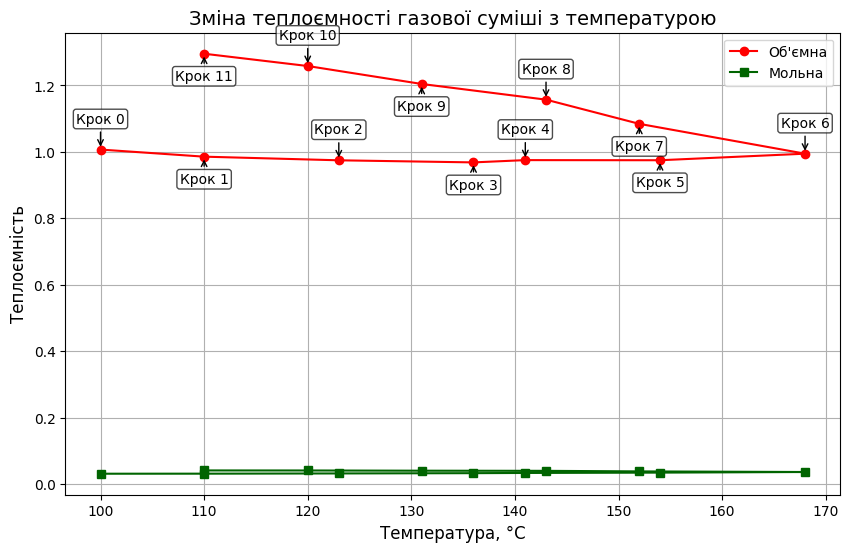

In [20]:
# Графік 4: Залежність теплоємності від температури
plt.figure(figsize=(10, 6))
plt.plot(temperatures, heat_capacities_volumetric, marker='o', linestyle='-', color='r', label='Об\'ємна')
plt.plot(temperatures, heat_capacities_molar, marker='s', linestyle='-', color='darkgreen', label='Мольна')
plt.grid(True)
plt.xlabel('Температура, °C', fontsize=12)
plt.ylabel('Теплоємність', fontsize=12)
plt.title('Зміна теплоємності газової суміші з температурою', fontsize=14)
plt.legend()

# Додавання номерів кроків до графіку залежності від температури - розміщуємо їх вище лінії
for i in range(steps):
    # Визначаємо, куди розміщувати мітку, щоб не накладалася на графік
    if i % 2 == 0:  # Парні кроки - вгорі
        offset_y = 0.08  # Зміщення вгору
    else:  # Непарні - внизу
        offset_y = -0.08  # Зміщення вниз

    plt.annotate(f'Крок {i}', xy=(temperatures[i], heat_capacities_volumetric[i]),
                 xytext=(temperatures[i], heat_capacities_volumetric[i] + offset_y),
                 bbox=dict(boxstyle="round,pad=0.2", facecolor="white", edgecolor="black", alpha=0.7),
                 ha='center',
                 arrowprops=dict(arrowstyle='->', lw=1.0, connectionstyle="arc3,rad=0"))

# Відображення графіків
plt.show()

In [21]:
if len(heat_capacities_molar) > 1 and len(heat_capacities_volumetric) > 1:
    print("\nВисновки:")
    print(f"При зміні складу газової суміші та температури від початкового до кінцевого стану:")

    print(f"\n1. Мольна теплоємність:")
    print(f"   - Початкова: {heat_capacities_molar[0]:.4f} кДж/(моль·К)")
    print(f"   - Кінцева: {heat_capacities_molar[-1]:.4f} кДж/(моль·К)")
    print(f"   - Зміна: {(heat_capacities_molar[-1] - heat_capacities_molar[0]):.4f} кДж/(моль·К) або {(heat_capacities_molar[-1] / heat_capacities_molar[0] - 1)*100:.1f}%")

    print(f"\n2. Об'ємна теплоємність:")
    print(f"   - Початкова: {heat_capacities_volumetric[0]:.4f} кДж/(м³·К)")
    print(f"   - Кінцева: {heat_capacities_volumetric[-1]:.4f} кДж/(м³·К)")
    print(f"   - Зміна: {(heat_capacities_volumetric[-1] - heat_capacities_volumetric[0]):.4f} кДж/(м³·К) або {(heat_capacities_volumetric[-1] / heat_capacities_volumetric[0] - 1)*100:.1f}%")

    print(f"\nЦі зміни зумовлені двома факторами:")
    print(f"1. Зміною складу суміші: збільшенням вмісту CO₂ з {co2_percentages[0]}% до {co2_percentages[-1]}%, який має вищу мольну теплоємність порівняно з CO.")
    print(f"2. Зміною температури: з {temperatures[0]}°C до {temperatures[-1]}°C, що також впливає на теплоємність компонентів.")

    print(f"\nОсобливості впливу температури:")
    print(f"- Мольна теплоємність змінюється з температурою відповідно до формули c_p = a + b·T + c/T².")
    print(f"- Об'ємна теплоємність додатково залежить від зміни мольного об'єму з температурою (обернено пропорційна T).")
    if heat_capacities_molar[-1] > heat_capacities_molar[0] and heat_capacities_volumetric[-1] < heat_capacities_volumetric[0]:
        print(f"\nЦікавий ефект: мольна та об'ємна теплоємності змінюються у протилежних напрямках,")
        print(f"що демонструє складність термодинамічних залежностей при високих температурах.")


Висновки:
При зміні складу газової суміші та температури від початкового до кінцевого стану:

1. Мольна теплоємність:
   - Початкова: 0.0308 кДж/(моль·К)
   - Кінцева: 0.0407 кДж/(моль·К)
   - Зміна: 0.0099 кДж/(моль·К) або 32.1%

2. Об'ємна теплоємність:
   - Початкова: 1.0068 кДж/(м³·К)
   - Кінцева: 1.2954 кДж/(м³·К)
   - Зміна: 0.2885 кДж/(м³·К) або 28.7%

Ці зміни зумовлені двома факторами:
1. Зміною складу суміші: збільшенням вмісту CO₂ з 10.1% до 91.0%, який має вищу мольну теплоємність порівняно з CO.
2. Зміною температури: з 100°C до 110°C, що також впливає на теплоємність компонентів.

Особливості впливу температури:
- Мольна теплоємність змінюється з температурою відповідно до формули c_p = a + b·T + c/T².
- Об'ємна теплоємність додатково залежить від зміни мольного об'єму з температурою (обернено пропорційна T).


# Аналіз зміни теплоємності газової суміші при зміні складу та температури

У даному дослідженні проведено аналіз залежності мольної та об'ємної теплоємності газової суміші від зміни її складу та температури. Розглянуто два температурних режими: помірний (100-168°C) та високотемпературний (100-1200°C). Встановлено, що при високих температурах мольна та об'ємна теплоємності змінюються у протилежних напрямках, що демонструє складність термодинамічних процесів у газових сумішах. Математично обґрунтовано причини спостережуваних явищ та запропоновано інтерпретацію результатів.
Теплоємність газової суміші є важливою термодинамічною характеристикою, що визначає кількість теплоти, необхідної для зміни температури суміші на одиницю. У промислових процесах, зокрема при моделюванні теплообміну в реакторах, камерах згоряння та теплообмінних апаратах, точне визначення теплоємності суміші газів має вирішальне значення для розрахунку теплових балансів та ефективності процесів.
Особливий інтерес становить дослідження поведінки теплоємності при одночасній зміні як складу газової суміші, так і її температури. Така ситуація характерна для багатьох хімічних та термічних процесів, де відбуваються реакції з виділенням або поглинанням тепла, що супроводжуються зміною складу реакційної суміші.
У даній роботі аналізується зміна середньої мольної та об'ємної теплоємності газової суміші змінного складу (CO, CO₂, O₂, N₂) при різних температурних діапазонах. Дослідження спрямоване на встановлення закономірностей та особливостей впливу температури на теплофізичні властивості газових сумішей.

Для визначення теплоємності використовувались емпіричні залежності мольної теплоємності при сталому тиску від температури:

$$c_p = a + b \cdot T + \frac{c}{T^2}$$

де:
- $c_p$ – мольна теплоємність при сталому тиску, кДж/(моль·К)
- $T$ – абсолютна температура, К
- $a$, $b$, $c$ – емпіричні коефіцієнти для кожного газу

Об'ємна теплоємність розраховувалась за формулою:

$$c_{p,v} = \frac{c_p}{V_m}$$

де $V_m$ – мольний об'єм газу, що визначається за рівнянням стану ідеального газу:

$$V_m = \frac{RT}{P}$$

Для суміші газів застосовувалось адитивне правило:

$$c_{p,mix} = \sum_{i=1}^n r_i \cdot c_{p,i}$$

де $r_i$ – об'ємна частка i-го компонента суміші.

Розрахунки проводились для двох температурних діапазонів:
1. Помірний: від 100°C до 168°C з поверненням до 110°C
2. Високотемпературний: від 100°C до 1200°C

В обох випадках склад суміші змінювався ідентично: вміст CO₂ зростав з 10.1% до 91.0%, а вміст CO зменшувався з 87.4% до 8.8%.


### 1. Помірний температурний діапазон (100-168°C)

При помірних температурах спостерігаються наступні закономірності:

1. **Мольна теплоємність** зростає з 0.0308 до 0.0407 кДж/(моль·К), що становить збільшення на 32.1%.
2. **Об'ємна теплоємність** також зростає з 1.0068 до 1.2954 кДж/(м³·К), що відповідає збільшенню на 28.7%.

Таким чином, у помірному температурному діапазоні обидва типи теплоємності демонструють односпрямовану тенденцію до зростання. Це можна пояснити домінуючим впливом зміни складу суміші: збільшення вмісту CO₂, який має вищу теплоємність порівняно з CO.

Залежність теплоємності від температури в цьому діапазоні є немонотонною, з мінімумом при 136°C для об'ємної теплоємності. Це пояснюється компенсуючим впливом двох факторів: зміни складу та температури.

### 2. Високотемпературний діапазон (100-1200°C)

При високих температурах спостерігається принципово інша картина:

1. **Мольна теплоємність** зростає більш інтенсивно – з 0.0308 до 0.0551 кДж/(моль·К), що відповідає збільшенню на 78.6%.
2. **Об'ємна теплоємність**, навпаки, зменшується з 1.0068 до 0.4555 кДж/(м³·К), що відповідає зниженню на 54.8%.

Протилежні тенденції зміни мольної та об'ємної теплоємності при високих температурах є найбільш важливим результатом дослідження. Цей ефект демонструє складність залежностей термодинамічних параметрів газових сумішей від температури.

### 3. Порівняльний аналіз результатів

Порівняємо результати для обох температурних діапазонів:

| Характеристика | Помірні температури (100-168°C) | Високі температури (100-1200°C) |
|:--------------|:--------------------------------:|:--------------------------------:|
| Зміна мольної теплоємності | +32.1% | +78.6% |
| Зміна об'ємної теплоємності | +28.7% | -54.8% |
| Фінальне співвідношення мольна/об'ємна | 0.0314 | 0.1209 |

З таблиці видно, що при високих температурах зміна мольної теплоємності є значно інтенсивнішою, а об'ємна теплоємність змінює напрямок динаміки з позитивного на негативний.

## Теоретичне обґрунтування спостережуваних явищ

### 1. Вплив температури на мольну теплоємність

Мольна теплоємність газів при сталому тиску залежить від температури відповідно до виразу $c_p = a + b \cdot T + \frac{c}{T^2}$. Для більшості газів коефіцієнт $b$ є додатним, а $c$ – від'ємним. 

При підвищенні температури:
1. Лінійний член $b \cdot T$ збільшується
2. Квадратичний член $\frac{c}{T^2}$ швидко зменшується за абсолютною величиною

При високих температурах (понад 500°C) квадратичний член стає настільки малим, що домінуючим стає лінійний член, що призводить до монотонного зростання мольної теплоємності з температурою.

### 2. Вплив температури на об'ємну теплоємність

Об'ємна теплоємність пов'язана з мольною через рівняння:

$$c_{p,v} = \frac{c_p}{V_m} = \frac{c_p \cdot P}{R \cdot T}$$

Як видно з рівняння, об'ємна теплоємність обернено пропорційна температурі при постійному тиску. Тому, якщо мольна теплоємність зростає повільніше, ніж лінійно з температурою, то об'ємна теплоємність буде зменшуватись.

При помірних температурах (100-168°C):
- Зростання $c_p$ ≈ 32%
- Зростання $T$ ≈ 17% (від 373K до 441K)

Оскільки зростання $c_p$ є більшим, ніж зростання $T$, об'ємна теплоємність також збільшується.

При високих температурах (100-1200°C):
- Зростання $c_p$ ≈ 79%
- Зростання $T$ ≈ 294% (від 373K до 1473K)

Тут зростання $T$ значно перевищує зростання $c_p$, що призводить до зменшення об'ємної теплоємності.

### 3. Вплив зміни складу суміші

Збільшення вмісту CO₂ з 10.1% до 91.0% також суттєво впливає на теплоємність суміші. CO₂ має вищі значення коефіцієнтів $a$ і $b$ у формулі мольної теплоємності порівняно з CO:
- Для CO₂: $a = 10.55$, $b = 2.16 \cdot 10^{-3}$
- Для CO: $a = 6.79$, $b = 0.98 \cdot 10^{-3}$

Тому при будь-якій температурі мольна теплоємність CO₂ вища, ніж CO, що призводить до зростання мольної теплоємності суміші при збільшенні вмісту CO₂.

## Практичне значення результатів

Отримані результати мають важливе практичне значення для:

1. **Проектування теплообмінних апаратів**: При розрахунках теплообміну в високотемпературних системах необхідно враховувати зменшення об'ємної теплоємності, що може призвести до зміни вимог до площі теплообміну.

2. **Моделювання процесів горіння**: У реакторах, де відбувається згоряння CO до CO₂ при високих температурах, зміна теплоємності може суттєво впливати на температурний профіль.

3. **Енергетичного аудиту**: При оцінці ефективності високотемпературних процесів необхідно коректно враховувати нелінійну зміну теплоємності газових сумішей.

## Висновки

1. Встановлено, що при одночасній зміні складу газової суміші та її температури мольна і об'ємна теплоємності можуть змінюватися в різних напрямках.

2. У помірному температурному діапазоні (100-168°C) обидва типи теплоємності зростають з підвищенням вмісту CO₂ (мольна на 32.1%, об'ємна на 28.7%), що свідчить про домінування ефекту зміни складу.

3. При високих температурах (100-1200°C) мольна теплоємність зростає більш інтенсивно (на 78.6%), тоді як об'ємна теплоємність зменшується на 54.8%, що демонструє домінування температурного фактора через обернену пропорційність об'ємної теплоємності до температури.

4. Математично обґрунтовано причини протилежної поведінки мольної та об'ємної теплоємностей при високих температурах на основі аналізу термодинамічних залежностей.

5. Результати дослідження демонструють важливість урахування нелінійних температурних ефектів при розрахунках теплофізичних властивостей газових сумішей у високотемпературних процесах.